<a href="https://colab.research.google.com/github/nafiul-araf/Anomaly-Detection/blob/main/Anomaly_Detection(Python_Outlier_Detection(PYOD)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [425]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [426]:
!pip install pyod

In [427]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.utils.data import get_outliers_inliers
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [428]:
df=pd.read_csv('/content/gdrive/MyDrive/heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [429]:
df.shape

(1190, 12)

In [430]:
df=df[['cholesterol', 'max heart rate', 'target']]
df.head()

,cholesterol,max heart rate,target
0,289,172,0
1,180,156,1
2,283,98,0
3,214,108,1
4,195,122,0


In [431]:
df.isnull().sum()

cholesterol       0
max heart rate    0
target            0
dtype: int64

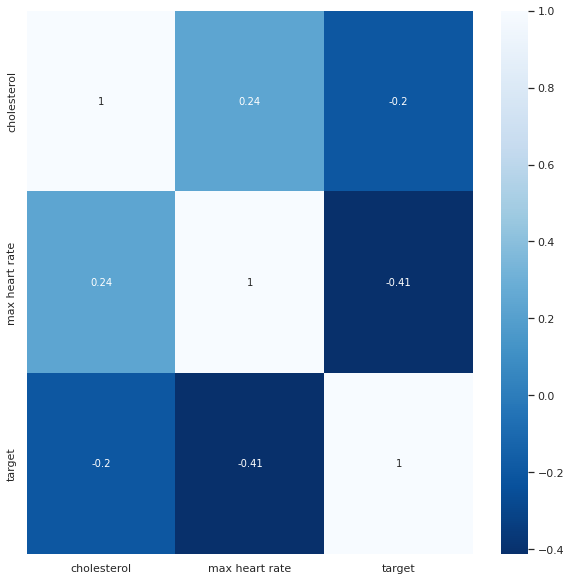

In [432]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues_r)
plt.show()

In [433]:
X=df.drop('target', axis=1)
X=(X-X.min())/(X.max()-X.min())
X=X.values
y=df['target'].values
print(type(X), type(y))
X.shape, y.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


((1190, 2), (1190,))

In [434]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=np.random.seed(50))
X_train.shape, X_test.shape

((797, 2), (393, 2))

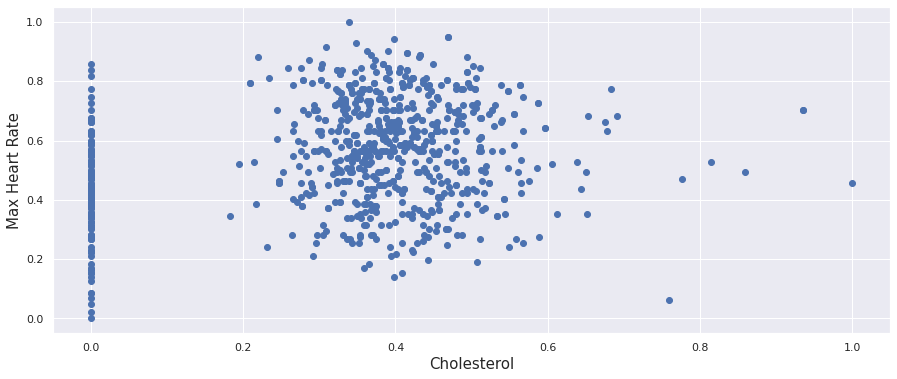

In [435]:
feature_chol=X_train[:, 0].reshape(-1, 1)
feature_max_heart_rate=X_train[:, 1].reshape(-1, 1)

plt.figure(figsize=(15, 6))
plt.scatter(feature_chol, feature_max_heart_rate)
plt.xlabel('Cholesterol', fontsize=15)
plt.ylabel('Max Heart Rate', fontsize=15)
plt.show()

In [436]:
outlier_train, inlier_train=get_outliers_inliers(X_train, y_train)

In [437]:
n_outlier_train, n_inlier_train=len(outlier_train), len(inlier_train)
n_outlier_train, n_inlier_train

(413, 384)

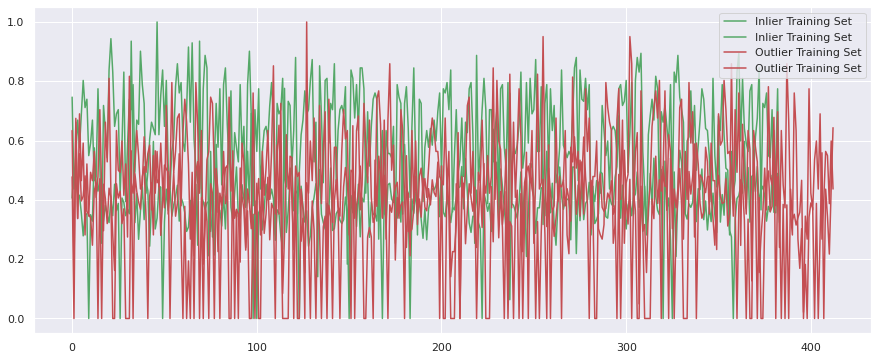

In [438]:
plt.figure(figsize=(15, 6))
plt.plot(inlier_train, color='g', label='Inlier Training Set')
plt.plot(outlier_train, color='r', label='Outlier Training Set')
plt.legend()
plt.show()

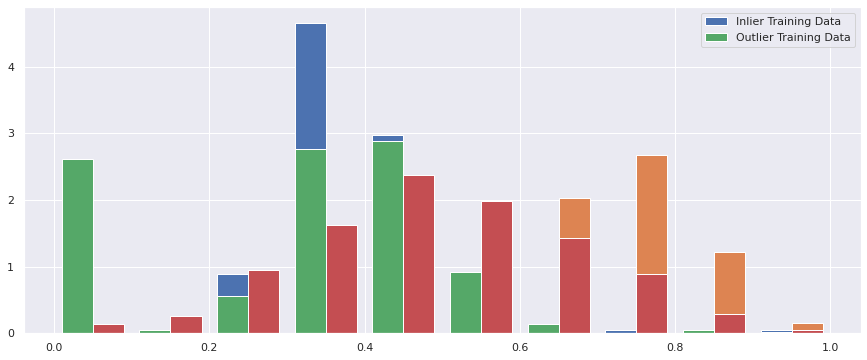

In [439]:
plt.figure(figsize=(15, 6))
plt.hist(inlier_train, density=True, label='Inlier Training Data')
plt.hist(outlier_train, density=True, label='Outlier Training Data')
plt.legend()
plt.show()

In [440]:
outlier_test, inlier_test=get_outliers_inliers(X_test, y_test)
n_outlier_test, n_inlier_test=len(outlier_test), len(inlier_test)
n_outlier_test, n_inlier_test

(216, 177)

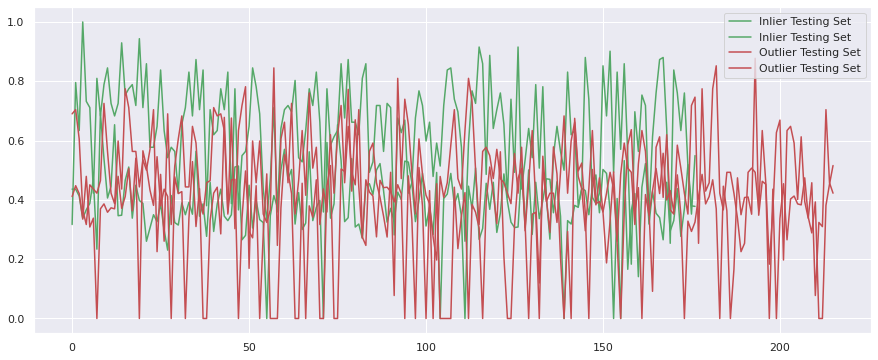

In [441]:
plt.figure(figsize=(15, 6))
plt.plot(inlier_test, color='g', label='Inlier Testing Set')
plt.plot(outlier_test, color='r', label='Outlier Testing Set')
plt.legend()
plt.show()

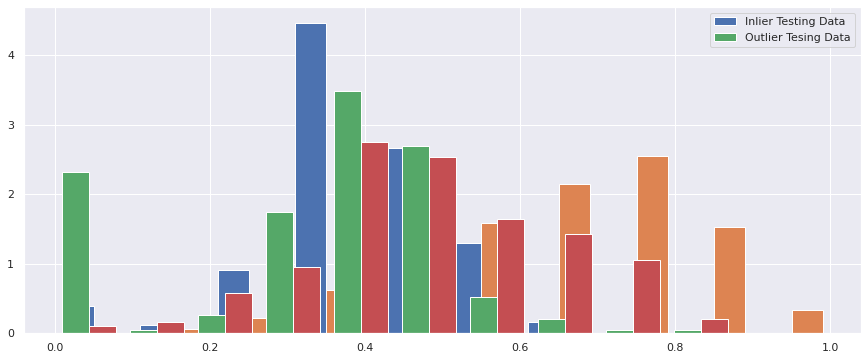

In [442]:
plt.figure(figsize=(15, 6))
plt.hist(inlier_test, density=True, label='Inlier Testing Data')
plt.hist(outlier_test, density=True, label='Outlier Tesing Data')
plt.legend()
plt.show()

In [443]:
outlier_fraction_train=n_outlier_train/X_train.shape[0]
outlier_fraction_train

0.5181932245922208

In [444]:
outlier_fraction_test=n_outlier_test/X_test.shape[0]
outlier_fraction_test

0.549618320610687

In [445]:
clf_knn=KNN(contamination=0.50, metric='euclidean', n_neighbors=100, n_jobs=-1)
clf_knn.fit(X_train, y_train)

KNN(algorithm='auto', contamination=0.5, leaf_size=30, method='largest',
  metric='euclidean', metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
  radius=1.0)

In [446]:
y_pred_train_knn=clf_knn.predict(X_train)
print('Actual: ',y_train[:10],' \nPredicted: ',y_pred_train_knn[:10])
n_errors=(y_train != y_pred_train_knn).sum()
print('Number of errors ',n_errors)
accuracy=np.mean((y_train==y_pred_train_knn))
print('Accuarcy: ',accuracy)

Actual:  [1 0 0 0 0 1 0 0 1 0]  
Predicted:  [0 0 1 0 0 1 0 0 1 1]
Number of errors  302
Accuarcy:  0.6210790464240903


In [447]:
y_pred_knn=clf_knn.predict(X_test)
print('Actual: ',y_test[:10],' \nPredicted: ',y_pred_knn[:10])
n_errors=(y_test != y_pred_knn).sum()
print('Number of errors ',n_errors)
accuracy=np.mean((y_test==y_pred_knn))
print('Accuarcy: ',accuracy)

Actual:  [0 0 1 0 1 0 0 0 0 1]  
Predicted:  [1 0 0 0 0 1 0 0 1 0]
Number of errors  156
Accuarcy:  0.6030534351145038


In [448]:
xx, yy=np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))

xx.shape, yy.shape

((500, 500), (500, 500))

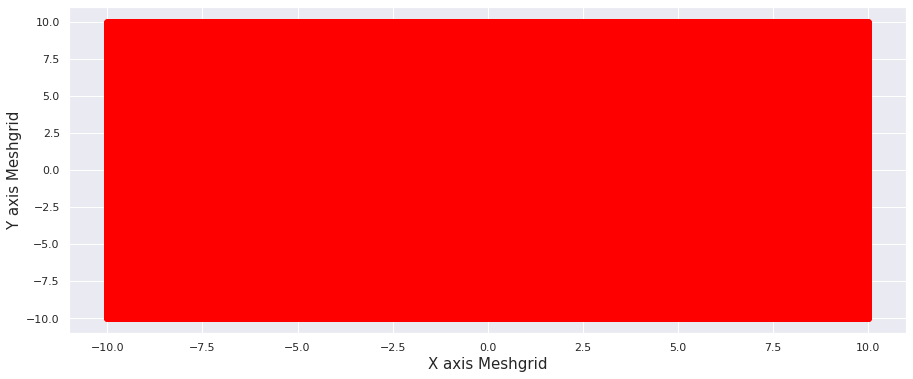

In [449]:
plt.figure(figsize=(15, 6))
plt.scatter(xx, yy, c='red')
plt.xlabel('X axis Meshgrid', fontsize=15)
plt.ylabel('Y axis Meshgrid', fontsize=15)
plt.show()

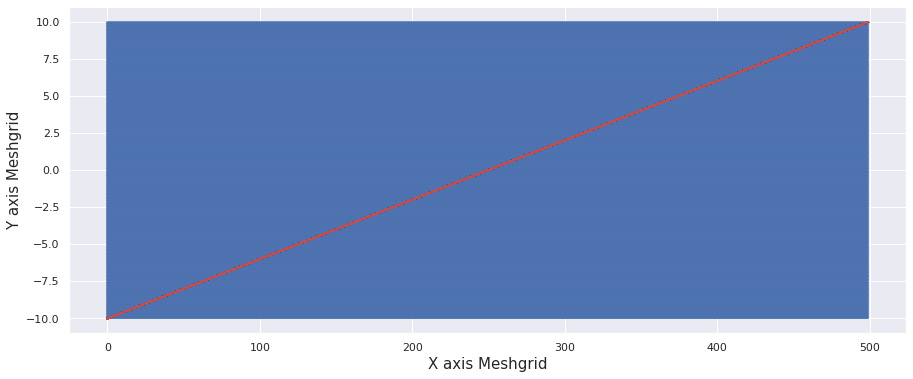

In [450]:
plt.figure(figsize=(15, 6))
plt.plot(xx, color='b')
plt.plot(yy, color='r')
plt.xlabel('X axis Meshgrid', fontsize=15)
plt.ylabel('Y axis Meshgrid', fontsize=15)
plt.show()

In [451]:
clf_iforest=IForest(n_estimators=200, contamination=0.50, max_features=X_train.shape[1], bootstrap=True, n_jobs=-1, behaviour='new', random_state=1)
clf_iforest.fit(X_train, y_train)

IForest(behaviour='new', bootstrap=True, contamination=0.5, max_features=2,
    max_samples='auto', n_estimators=200, n_jobs=-1, random_state=1,
    verbose=0)

In [452]:
y_pred_train_tree=clf_iforest.predict(X_train)
print('Actual: ',y_train[:10],' \nPredicted: ',y_pred_train_tree[:10])
n_errors=(y_train != y_pred_train_tree).sum()
print('Number of errors ',n_errors)
accuracy=np.mean((y_train==y_pred_train_tree))
print('Accuarcy: ',accuracy)

Actual:  [1 0 0 0 0 1 0 0 1 0]  
Predicted:  [0 0 1 0 0 1 0 0 1 1]
Number of errors  301
Accuarcy:  0.6223337515683814


In [453]:
y_pred_tree=clf_iforest.predict(X_test)
print('Actual: ',y_test[:10],' \nPredicted: ',y_pred_tree[:10])
n_errors=(y_test != y_pred_tree).sum()
print('Number of errors ',n_errors)
accuracy=np.mean((y_test==y_pred_tree))
print('Accuarcy: ',accuracy)

Actual:  [0 0 1 0 1 0 0 0 0 1]  
Predicted:  [1 0 0 0 0 1 0 0 1 0]
Number of errors  173
Accuarcy:  0.5597964376590331


In [454]:
def prediction_score(train, test, classifier):
  train_score=classifier.decision_function(train)
  test_score=classifier.decision_function(test)

  return train_score, test_score

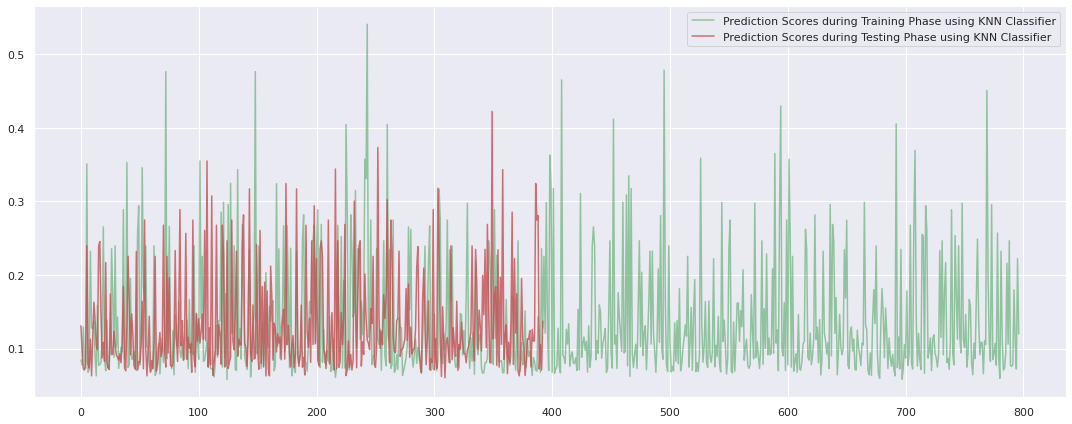

In [455]:
prediction_scores_train_knn, prediction_scores_test_knn=prediction_score(X_train, X_test, clf_knn)
plt.figure(figsize=(15, 6))
plt.plot(prediction_scores_train_knn, color='g', alpha=0.60, label='Prediction Scores during Training Phase using KNN Classifier')
plt.plot(prediction_scores_test_knn, color='r', alpha=0.80, label='Prediction Scores during Testing Phase using KNN Classifier')
plt.legend(loc='Best')
plt.tight_layout()
plt.show()

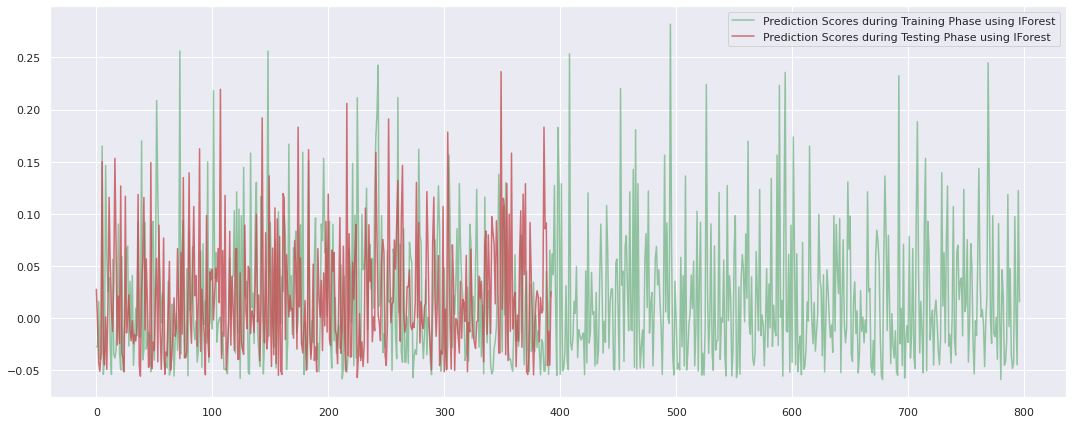

In [456]:
prediction_scores_train_iforest, prediction_scores_test_iforest=prediction_score(X_train, X_test, clf_iforest)
plt.figure(figsize=(15, 6))
plt.plot(prediction_scores_train_iforest, color='g', alpha=0.60, label='Prediction Scores during Training Phase using IForest')
plt.plot(prediction_scores_test_iforest, color='r', alpha=0.80, label='Prediction Scores during Testing Phase using IForest')
plt.legend(loc='Best')
plt.tight_layout()
plt.show()

In [457]:
def decision_scores(classifier1, classifier2):
  ds1=classifier1.decision_scores_
  ds2=classifier2.decision_scores_
  
  plt.figure(figsize=(15, 6))
  plt.plot(ds1, color='b', label='Decision Score using '+str(classifier1)+' Classifier')
  plt.plot(ds2, color='r', label='Decision Score using '+str(classifier2)+' Classifier')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

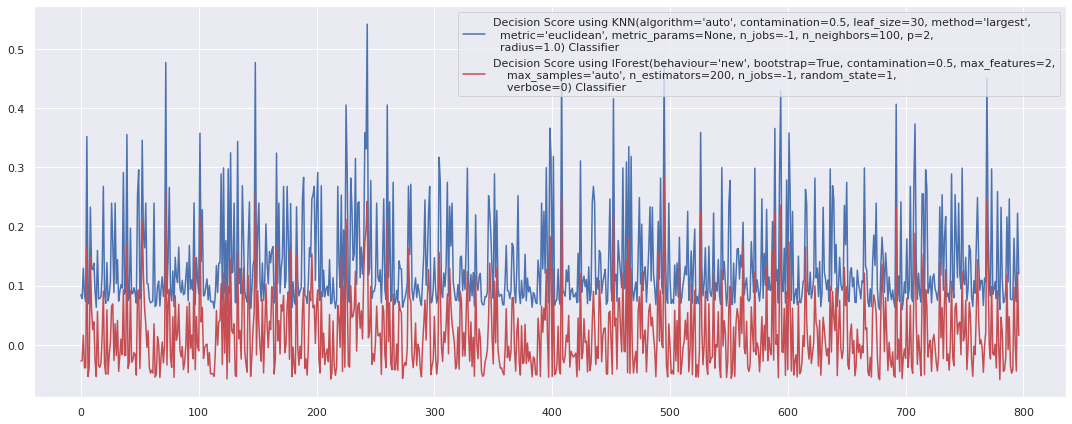

In [458]:
decision_scores(clf_knn, clf_iforest)

In [459]:
def thresholding_outlier(train_pred_score, test_pred_score, outlier_fraction):
  train_outlier_threshold=ss.scoreatpercentile(train_pred_score, 100*outlier_fraction)
  test_outlier_threshold=ss.scoreatpercentile(test_pred_score, 100*outlier_fraction)

  return train_outlier_threshold, test_outlier_threshold

In [460]:
outlier_threshold_train_knn, outlier_threshold_test_knn=thresholding_outlier(prediction_scores_train_knn, prediction_scores_test_knn, 
                                                                             0.50)
outlier_threshold_train_knn, outlier_threshold_test_knn

(0.10542269554214075, 0.1074326361742816)

In [461]:
outlier_threshold_train_iforest, outlier_threshold_test_iforest=thresholding_outlier(prediction_scores_train_iforest, 
                                                                                     prediction_scores_test_iforest, 0.50)
outlier_threshold_train_iforest, outlier_threshold_test_iforest

(0.0, 0.004407522526519381)

In [462]:
def raw_anomaly_scores(Classifier, xx, yy):
  Z=Classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])* -1
  Z=Z.reshape(xx.shape)
  return Z

In [463]:
Z_knn=raw_anomaly_scores(clf_knn, xx, yy)
print(Z_knn)

[[-14.54084841 -14.51259905 -14.48399272 ... -14.06638677 -14.09366193
  -14.12090257]
 [-14.51177727 -14.48418734 -14.45592021 ... -14.03701667 -14.06427787
  -14.09134565]
 [-14.48275869 -14.45511337 -14.42752642 ... -14.00765363 -14.03471615
  -14.06184083]
 ...
 [-13.79125782 -13.76222349 -13.73302377 ... -13.18119552 -13.2098607
  -13.23858516]
 [-13.81888945 -13.78960378 -13.75964416 ... -13.20916891 -13.23787435
  -13.26653815]
 [-13.84618463 -13.81623142 -13.78632966 ... -13.23715612 -13.26584568
  -13.2945532 ]]


In [464]:
Z_knn.min(), Z_knn.max()

(-14.540848412832288, -0.0630419357123001)

In [465]:
Z_iforest=raw_anomaly_scores(clf_iforest, xx, yy)
print(Z_iforest)

[[-0.25342009 -0.25342009 -0.25342009 ... -0.32051287 -0.32051287
  -0.32051287]
 [-0.25342009 -0.25342009 -0.25342009 ... -0.32051287 -0.32051287
  -0.32051287]
 [-0.25342009 -0.25342009 -0.25342009 ... -0.32051287 -0.32051287
  -0.32051287]
 ...
 [-0.25810244 -0.25810244 -0.25810244 ... -0.31065441 -0.31065441
  -0.31065441]
 [-0.25810244 -0.25810244 -0.25810244 ... -0.31065441 -0.31065441
  -0.31065441]
 [-0.25810244 -0.25810244 -0.25810244 ... -0.31065441 -0.31065441
  -0.31065441]]


In [466]:
Z_iforest.min(), Z_iforest.max()

(-0.320512874590034, 0.05368458608002913)

In [467]:
def plotting_full_scene(xx, yy, Z, threshold, data, n_outlier, title):
  plt.figure(figsize=(30, 30))
  subplot=plt.subplot(121)

  #filling blue colormap from minimum anomaly score to threshold value
  if Z.min() < 0:
    subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Blues_r)
  else:
    subplot.contourf(xx, yy, Z, levels=np.linspace(threshold, Z.min(), 10), cmap=plt.cm.Blues_r)
  
  #drawing red contour line where anomaly score is equal to threshold
  a=subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')

  #filling orange contour lines where range of anomaly score is from threshold to maximum anomaly score
  if Z.max() < 0:
    subplot.contourf(xx, yy, Z, levels=[Z.max(), threshold], colors='orange')
  else:
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')
  
  #scatter plot of inliers with white dots
  b=subplot.scatter(data[:-n_outlier, 0], data[:-n_outlier, 1], color='white', s=20, edgecolor='k')

  #scatter plot of inliers with white dots
  c=subplot.scatter(data[-n_outlier:, 0], data[-n_outlier:, 1], color='black', s=20, edgecolor='k')

  subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true outliers', 'true inliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='best'
  )
 
  subplot.set_title(title)
  subplot.set_xlim((-10, 10))
  subplot.set_ylim((-10, 10))
  plt.show()

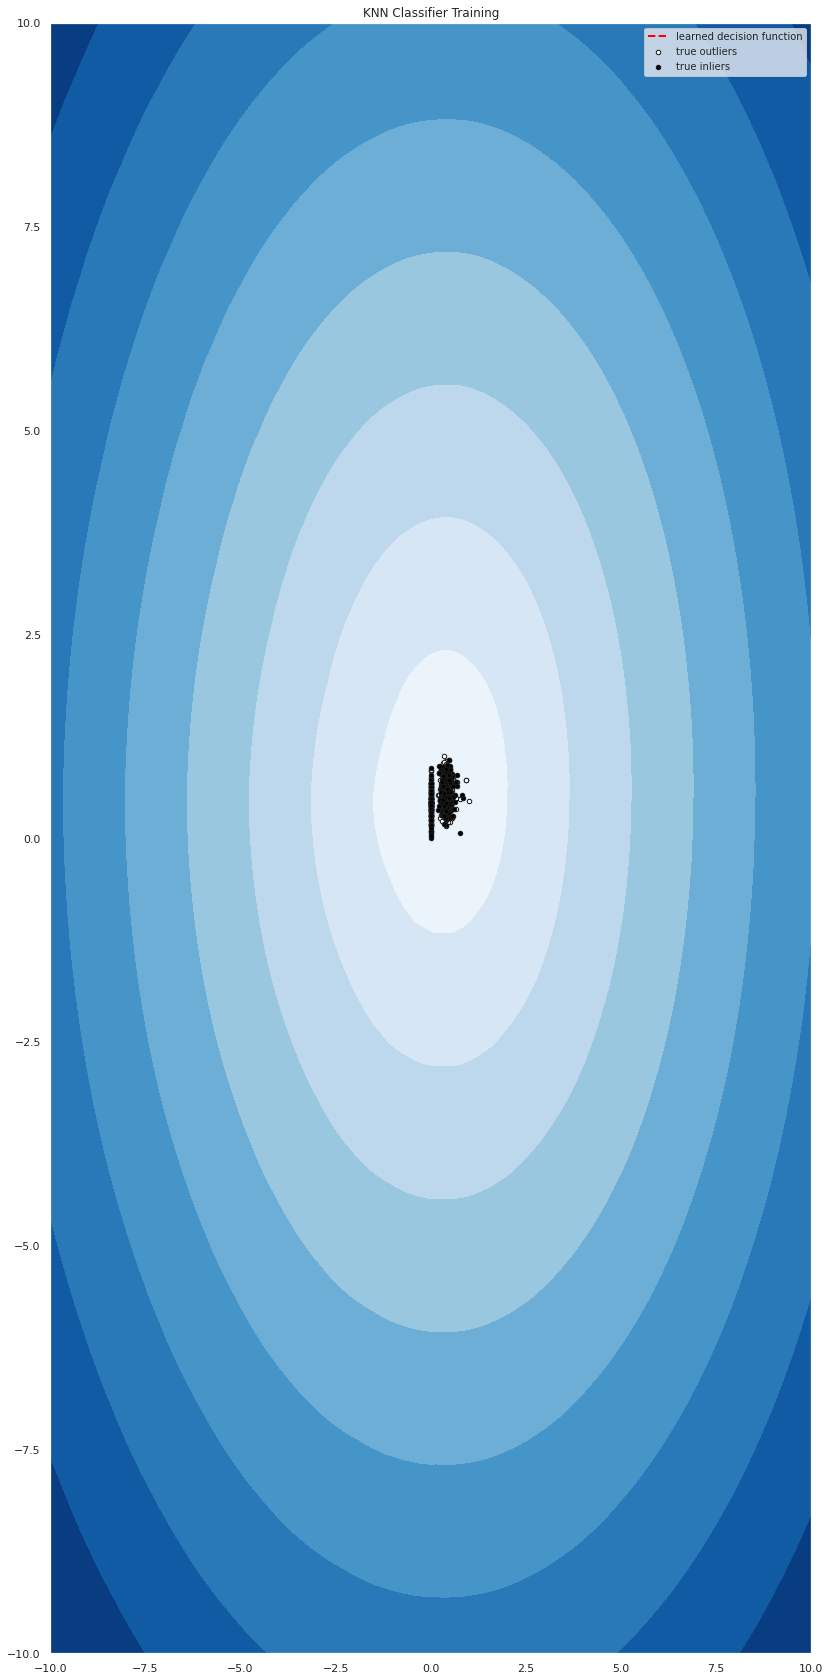

In [468]:
plotting_full_scene(xx=xx, yy=yy, Z=Z_knn, threshold=outlier_threshold_train_knn, data=X_train, n_outlier=n_outlier_train, 
                    title='KNN Classifier Training')

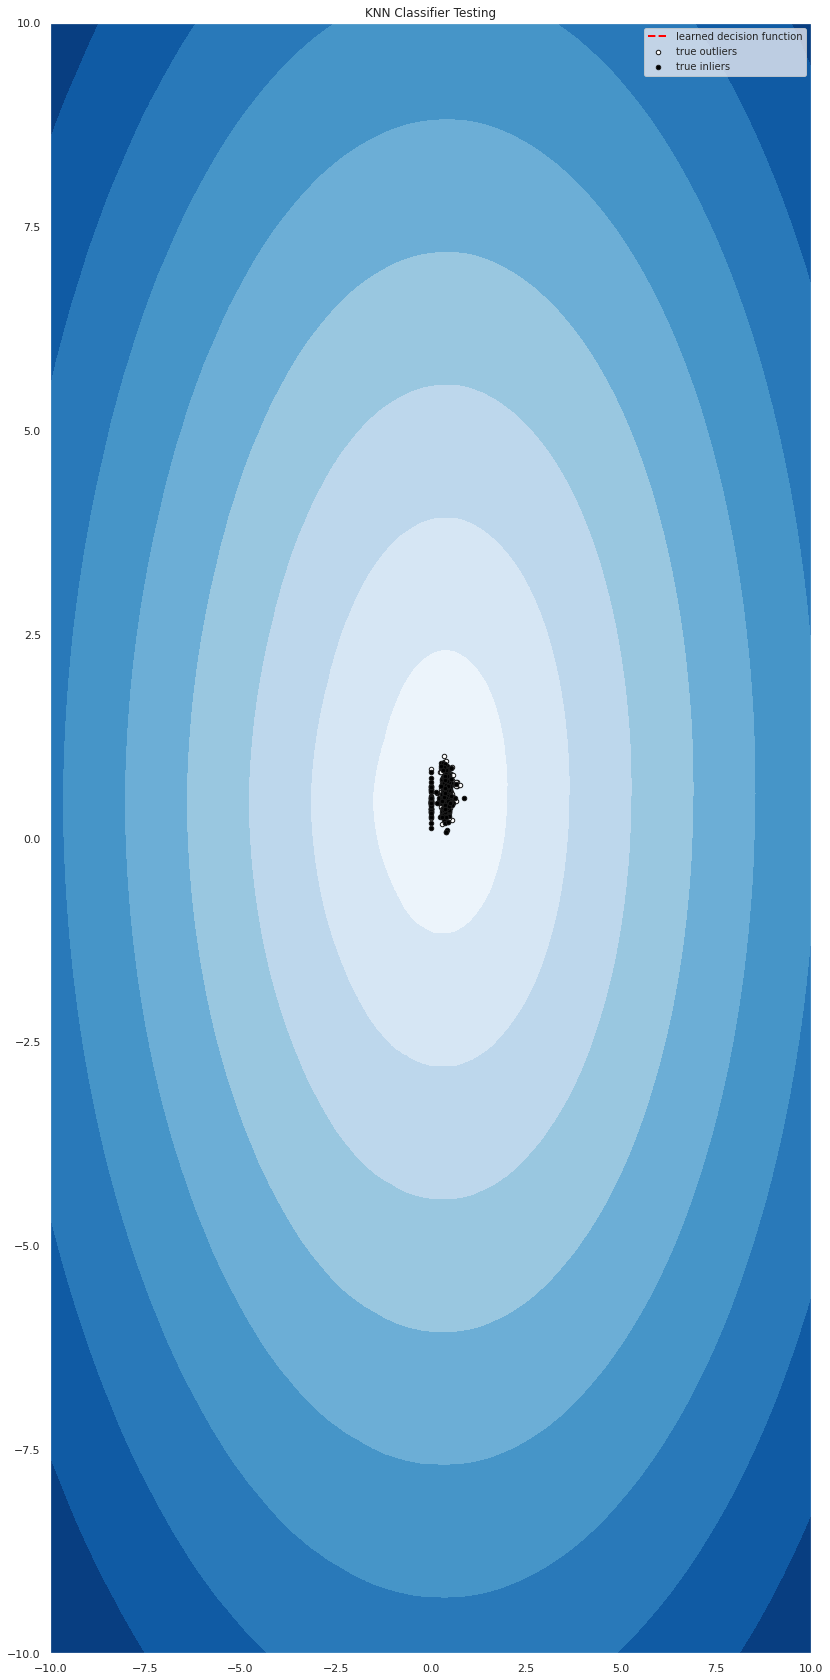

In [469]:
plotting_full_scene(xx=xx, yy=yy, Z=Z_knn, threshold=outlier_threshold_test_knn, data=X_test, n_outlier=n_outlier_test, 
                    title='KNN Classifier Testing')

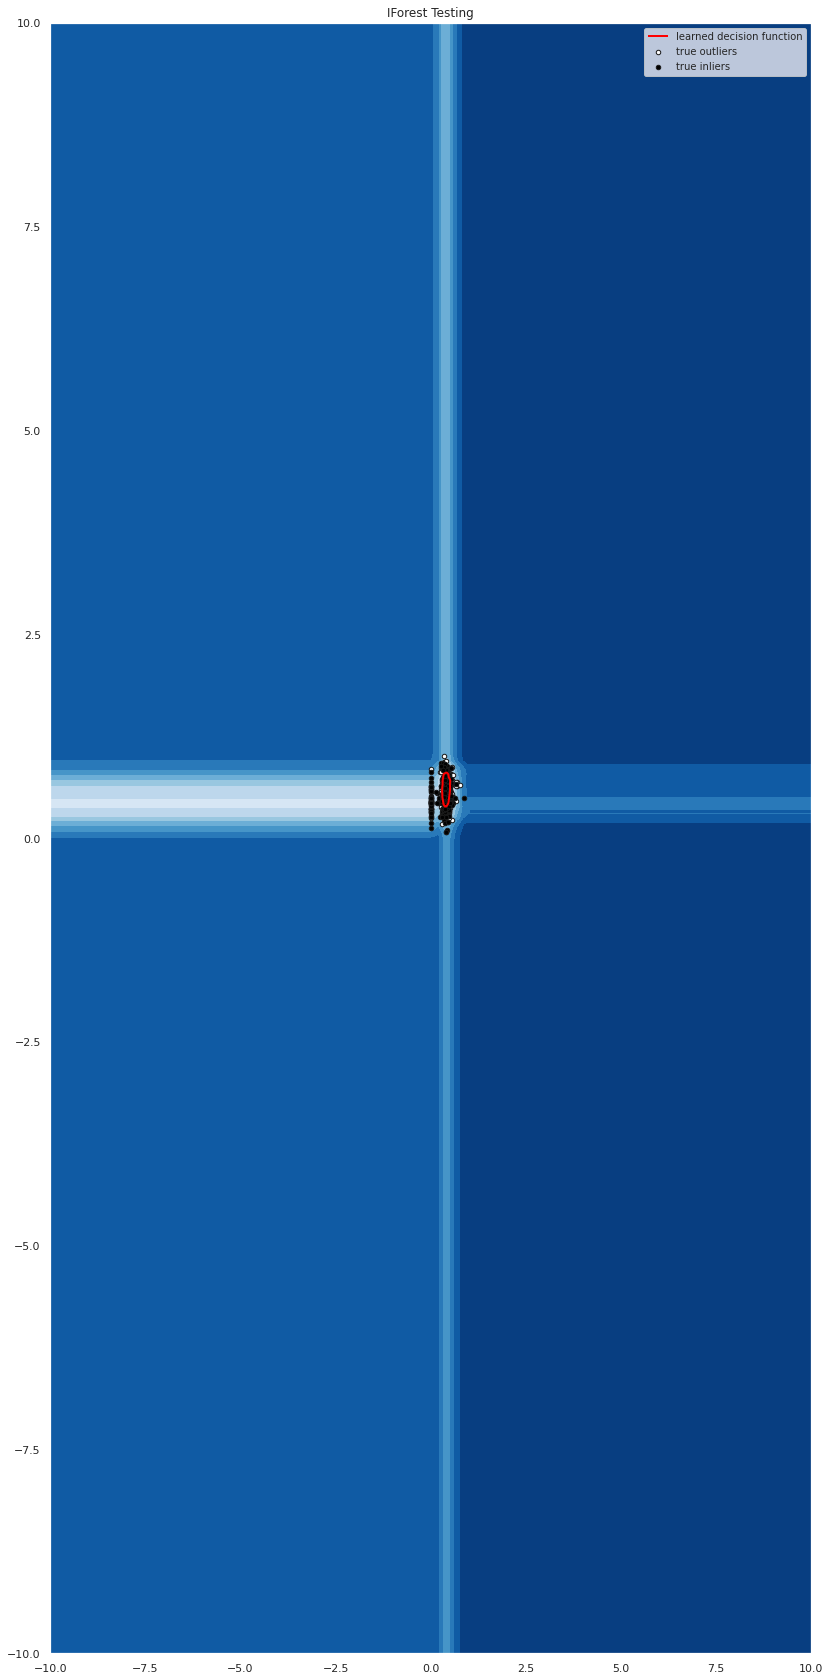

In [470]:
plotting_full_scene(xx=xx, yy=yy, Z=Z_iforest, threshold=outlier_threshold_test_iforest, data=X_test, n_outlier=n_outlier_test, 
                    title='IForest Testing')

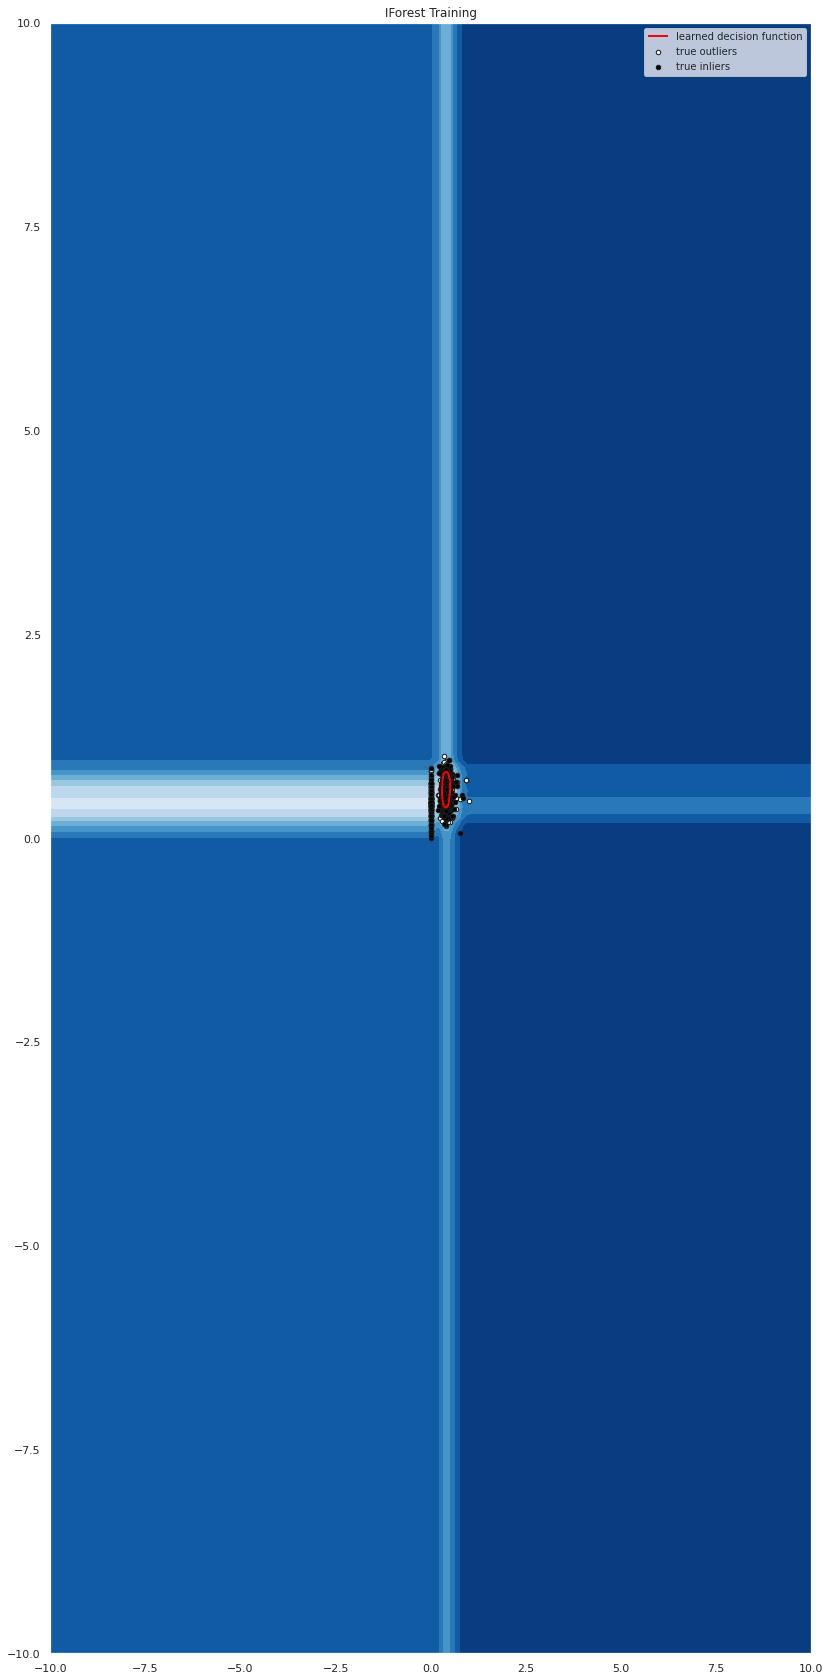

In [471]:
plotting_full_scene(xx=xx, yy=yy, Z=Z_iforest, threshold=outlier_threshold_train_iforest, data=X_train, n_outlier=n_outlier_train, 
                    title='IForest Training')